# Linear Algebra

In [86]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

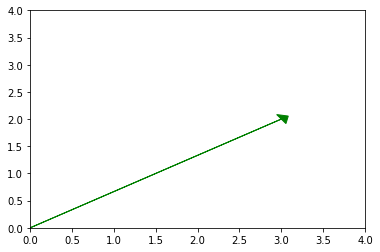

In [8]:
a = np.array([[3],
              [2]])
plt.arrow(0, 0, a[0][0], a[1][0], 
          head_width=0.2, 
          head_length=0.1, 
          color='g')

plt.xlim(0, 4)
plt.ylim(0,4)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [11]:
# With numpy
b = np.array([17, -4, -2, 1])
norm_b = linalg.norm(b)
norm_b

17.60681686165901

In [15]:
# Without numpy
sum = 0
for i in b:
    sum += i**2
norm_b = math.sqrt(sum)
norm_b

17.60681686165901

The norm of a vector represents its length (magnitude). 

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [21]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

In [22]:
# With numpy
np.dot(c, d)

42

In [20]:
# Without numpy
sum = 0
for a, b in zip(c,d):
    sum += a*b
print(sum)

42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [23]:
E = np.array([[7, 4, 2], 
             [1, 3, -1],
             [2, 6, -4]])

In [24]:
# E Transposed 
np.transpose(E)

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

In [25]:
# Inverse of E
linalg.inv(E)

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

In [33]:
# Verify that original matrix times inverse produces identity matrix
np.matmul(E, linalg.inv(E))

array([[1.00000000e+00, 4.44089210e-16, 0.00000000e+00],
       [2.77555756e-17, 1.00000000e+00, 1.11022302e-16],
       [5.55111512e-17, 0.00000000e+00, 1.00000000e+00]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [35]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [45]:
print('Mean of Customers: ', np.mean(df['customers']) )
print('Mean of Snow: ', np.mean(df['snow']) )

Mean of Customers:  1135.7142857142858
Mean of Snow:  2.7142857142857144


In [54]:
print('Variance of Customers: ', np.var(df['customers'], ddof=1) )
print('Variance of Snow: ', np.var(df['snow'], ddof=1) )

Variance of Customers:  98761.90476190478
Variance of Snow:  8.571428571428571


In [50]:
print('Standard Deviation of Customers: ', np.std(df['customers'], ddof=1))
print('Standard Deviation of Snow: ', np.std(df['snow'], ddof=1) )

Standard Deviation of Customers:  314.26406851866597
Standard Deviation of Snow:  2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

They are not comparable because they are not in the same units.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [52]:
# Variance-Covariance matrix
np.cov(df['customers'],df['snow'])

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

As the covariance numbers are unbounded, it is hard to interpret the numbers. The below coeficient of coorlation is bounded [-1, 1] and thus allows for better interprtation of results.

In [56]:
# Coefficient of coorelation
np.corrcoef(df['customers'], df['snow'])

array([[1.        , 0.72846346],
       [0.72846346, 1.        ]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [65]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


Note: Am assuming that the country column is the target in the dataset

In [66]:
features = df.drop(columns='Country')
features.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [67]:
target = df['Country']

Standardizing data

In [73]:
scaled = StandardScaler().fit_transform(features)

pd.DataFrame(scaled)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [77]:
pca = PCA(n_components=2)

pca.fit(scaled)

components = pca.transform(scaled)

components = pd.DataFrame(components)

In [78]:
components.head()

,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


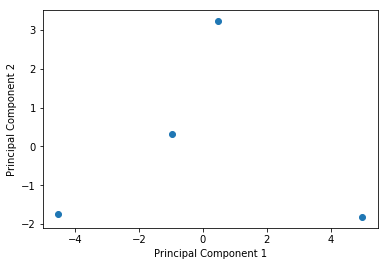

In [82]:
plt.scatter(components[0], components[1])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [83]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [84]:
points.shape

(200, 2)

In [85]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


In [118]:
# Standize/Normalize the data as distribution is currently not normal
points = StandardScaler().fit_transform(points)
points = pd.DataFrame(standardized)
points = points.rename(columns={
    0:'x',
    1:'y'
})
points.describe()

,x,y
count,2.000000e+02,2.000000e+02
mean,3.247402e-17,3.330669e-17
std,1.002509e+00,1.002509e+00
min,-1.715069e+00,-1.378308e+00
25%,-5.052073e-01,-8.665439e-01
50%,-2.311267e-01,-3.385765e-01
75%,4.171789e-01,1.218429e+00
max,2.229030e+00,1.671647e+00


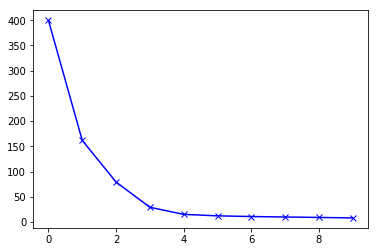

In [119]:
sum_of_sqaured_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_sqaured_distances.append(km.inertia_)
    
plt.plot(sum_of_sqaured_distances, 'bx-');

Based on the results of the elbow method, I will use 4 clusters as the input for the KMeans visualization

In [120]:
km = KMeans(n_clusters=4)
km = km.fit(points)
result = km.transform(points)

labels = pd.DataFrame(km.labels_)
labels = labels.rename(columns={0:'clusters'})

final = pd.concat([points, labels], axis=1)
final.sample(10)

,x,y,clusters
59,-1.369617,0.032810,3
159,-1.573125,0.081875,3
143,2.093805,1.224434,1
3,-0.897263,-0.323537,3
154,-0.446726,-1.033400,0
37,-0.185125,-0.547724,0
141,-0.243187,-0.775591,0
166,0.101376,-0.861386,0
147,-0.440826,1.521985,2
85,-0.185843,-0.661716,0


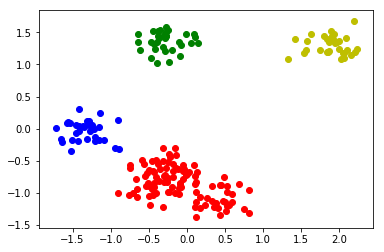

In [121]:
colors = ['r', 'y', 'g', 'b']
for i in range(4):
    subset = final[ final['clusters'] == i ]
    plt.scatter(subset['x'], subset['y'], color=colors[i])

plt.show()